In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import cv2
from skimage import data

In [2]:
import os
os.listdir( os.getcwd() )

['.config', 'sample_data']

In [3]:
# Ejercicio
A = np.array([[2, 1],
              [1, 2]])
lambdas, vectors = np.linalg.eig(A)
diag = np.diag(lambdas)
V_inv = np.linalg.inv(vectors)
temp = np.dot(vectors, diag)
A_reconstruida = np.dot(temp, V_inv)

print("Matriz A original:")
print(A)
print("\nValores propios:", lambdas)
print("\nVectores propios (columnas de V):")
print(vectors)
print("\nReconstrucción de A = V * Λ * V⁻¹:")
print(A_reconstruida)
print("\n¿Reconstrucción ≈ A original?")
print(np.allclose(A, A_reconstruida))

Matriz A original:
[[2 1]
 [1 2]]

Valores propios: [3. 1.]

Vectores propios (columnas de V):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Reconstrucción de A = V * Λ * V⁻¹:
[[2. 1.]
 [1. 2.]]

¿Reconstrucción ≈ A original?
True


In [4]:
#P1
def convolucion(matriz, kernel):
    m, n = matriz.shape
    k, l = kernel.shape
    pad_x = k // 2
    pad_y = l // 2
    matriz_pad = np.pad(matriz, ((pad_x, pad_x), (pad_y, pad_y)), mode='constant', constant_values=0)
    resultado = np.zeros_like(matriz)

    for i in range(m):
        for j in range(n):
            submatriz = matriz_pad[i:i+k, j:j+l]
            resultado[i, j] = np.sum(submatriz * kernel)

    return resultado

matriz = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

resultado = convolucion(matriz, kernel)
print("Matriz original:\n", matriz)
print("Kernel:\n", kernel)
print("Matriz después de la convolución:\n", resultado)

Matriz original:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Kernel:
 [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
Matriz después de la convolución:
 [[-3 -3 11]
 [ 9  0 21]
 [39 33 53]]


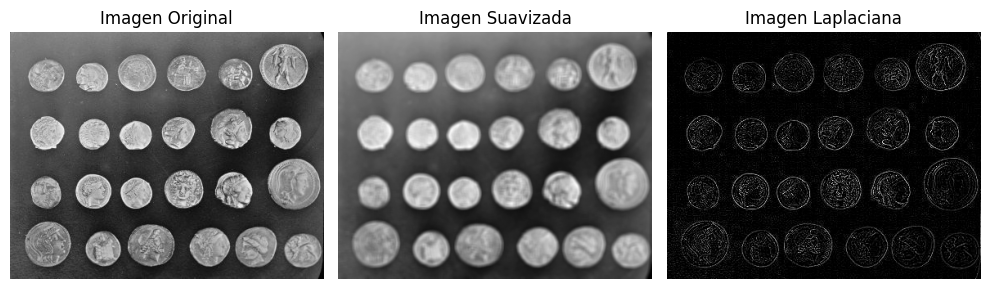

In [5]:
#P2
imagen = data.coins()
n = 5
kernel_promediador = np.ones((5, 5), np.float32) / (n*n)
imagen_suavizada = cv2.filter2D(imagen, -1, kernel_promediador)
kernel_laplaciano = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
imagen_laplaciana = cv2.filter2D(imagen, -1, kernel_laplaciano)

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(imagen, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Imagen Suavizada")
plt.imshow(imagen_suavizada, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Imagen Laplaciana")
plt.imshow(imagen_laplaciana, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

Número de componentes necesarios para 95% de varianza: 2


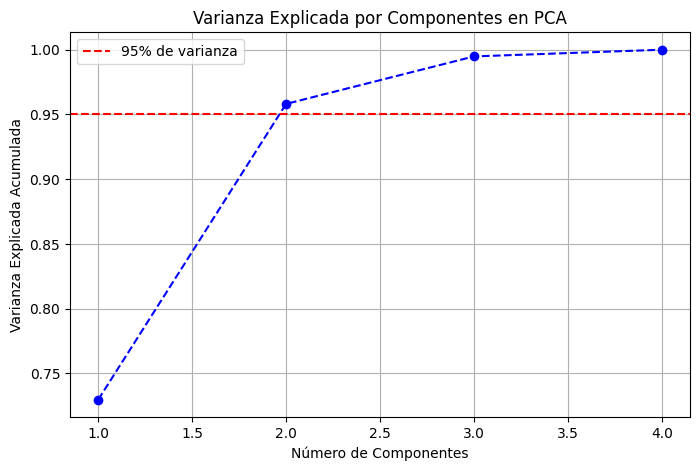

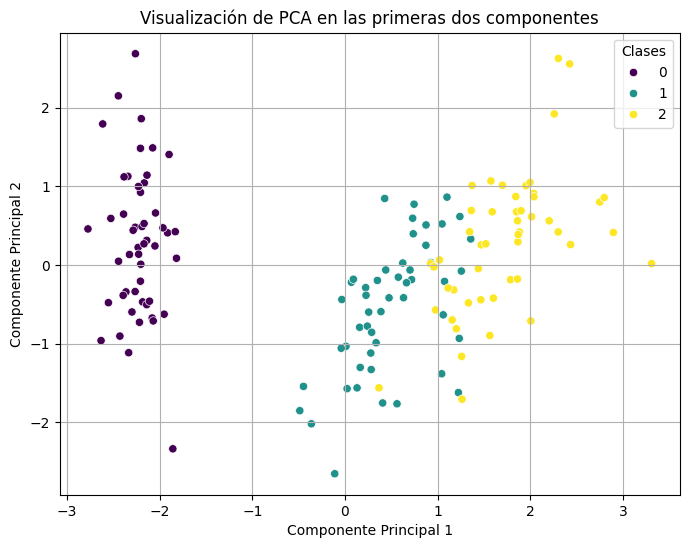

In [6]:
#P3
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_full = PCA(n_components=None)
pca_full.fit(X_scaled)
varianza_acumulada = np.cumsum(pca_full.explained_variance_ratio_)

num_componentes = np.argmax(varianza_acumulada >= 0.95) + 1
print(f"Número de componentes necesarios para 95% de varianza: {num_componentes}")

pca = PCA(n_components=num_componentes)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% de varianza")
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes en PCA')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=label_encoder.inverse_transform(y_encoded), palette='viridis')
plt.xlabel(f'Componente Principal 1')
plt.ylabel(f'Componente Principal 2')
plt.title('Visualización de PCA en las primeras dos componentes')
plt.legend(title="Clases")
plt.grid()
plt.show()